## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib
from matplotlib import style
import matplotlib.pyplot as plt

import seaborn as sns
import pandas_profiling
import pickle

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

sns.set_style("darkgrid", {"axes.facecolor": ".9"})
%matplotlib inline

## Load Dataset

Data Deskription :
1. umur : age
2. pekerjaan : job (admin, 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
3. spesialisasi gelar (S1) : degree, mba
4. jenis dan pengalaman kerja : workex, etest
5. tawaran gaji kepada siswa yang ditempatkan : salary

In [2]:
data = pd.read_csv('bank/bank-full.csv', sep = ';',)
display(data.head())

age           job  marital  education default  balance housing loan  \
0   58    management  married   tertiary      no     2143     yes   no   
1   44    technician   single  secondary      no       29     yes   no   
2   33  entrepreneur  married  secondary      no        2     yes  yes   
3   47   blue-collar  married    unknown      no     1506     yes   no   
4   33       unknown   single    unknown      no        1      no   no   

   contact  day month  duration  campaign  pdays  previous poutcome   y  
0  unknown    5   may       261         1     -1         0  unknown  no  
1  unknown    5   may       151         1     -1         0  unknown  no  
2  unknown    5   may        76         1     -1         0  unknown  no  
3  unknown    5   may        92         1     -1         0  unknown  no  
4  unknown    5   may       198         1     -1         0  unknown  no

In [3]:
data.tail()

age           job   marital  education default  balance housing loan  \
45206   51    technician   married   tertiary      no      825      no   no   
45207   71       retired  divorced    primary      no     1729      no   no   
45208   72       retired   married  secondary      no     5715      no   no   
45209   57   blue-collar   married  secondary      no      668      no   no   
45210   37  entrepreneur   married  secondary      no     2971      no   no   

         contact  day month  duration  campaign  pdays  previous poutcome    y  
45206   cellular   17   nov       977         3     -1         0  unknown  yes  
45207   cellular   17   nov       456         2     -1         0  unknown  yes  
45208   cellular   17   nov      1127         5    184         3  success  yes  
45209  telephone   17   nov       508         4     -1         0  unknown   no  
45210   cellular   17   nov       361         2    188        11    other   no

In [4]:
display(data.info())
print('Data shape (row, column): {}'.format(data.shape))

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


None

Data shape (row, column): (45211, 17)


- Dapat dilihat tidak terdapat missing values pada semua kolom

## Data Statistics

In [5]:
report_pp = data.profile_report(progress_bar=False, title='Bank Data - Report')

# saving the report
report_pp.to_file(output_file='Bank Data - Report.html')
report_pp

Berdasarkan hasil korelasi diatas, dapat ditentukan bahwa hanya fitur housing, month, duration, putcome yang akan digunakan untuk variable input (x) terhadap variable output (y)

In [6]:
data[data.duplicated()]

Empty DataFrame
Columns: [age, job, marital, education, default, balance, housing, loan, contact, day, month, duration, campaign, pdays, previous, poutcome, y]
Index: []

Dapat dilihat, tidak terdapat banyak data yang duplikat dan bisa dipakai untuk data training ataupun test

## EDA

### Features Correlation

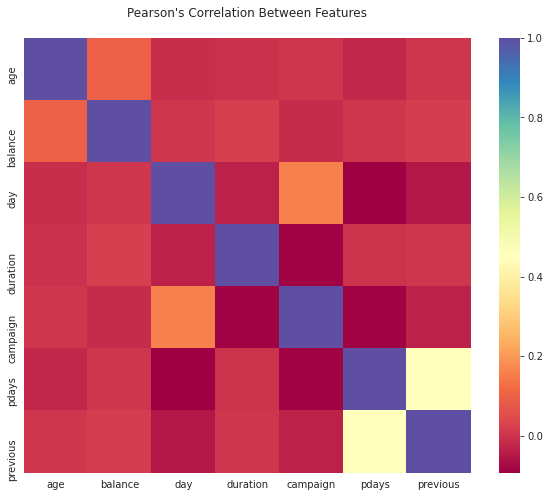

In [7]:
data_corr = data.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(data=data_corr, cmap='Spectral')
plt.title('Pearson\'s Correlation Between Features\n')
plt.show()

## Data Pre-processing

In [8]:
scaler = StandardScaler()

# Scale this feature
scale_this = ['duration', 'campaign', 'pdays', 'previous']
for s in scale_this:
    new = scaler.fit_transform(np.array(data[s]).reshape(-1, 1))
    data[s] = new
    
object_cols = ['job','marital','education','default','housing','loan','contact','month','poutcome','y']

label_encoder = LabelEncoder()
for col in object_cols:
    data[col] = label_encoder.fit_transform(data[col])
    
data.head()

age  job  marital  education  default  balance  housing  loan  contact  \
0   58    4        1          2        0     2143        1     0        2   
1   44    9        2          1        0       29        1     0        2   
2   33    2        1          1        0        2        1     1        2   
3   47    1        1          3        0     1506        1     0        2   
4   33   11        2          3        0        1        0     0        2   

   day  month  duration  campaign     pdays  previous  poutcome  y  
0    5      8  0.011016 -0.569351 -0.411453  -0.25194         3  0  
1    5      8 -0.416127 -0.569351 -0.411453  -0.25194         3  0  
2    5      8 -0.707361 -0.569351 -0.411453  -0.25194         3  0  
3    5      8 -0.645231 -0.569351 -0.411453  -0.25194         3  0  
4    5      8 -0.233620 -0.569351 -0.411453  -0.25194         3  0

In [9]:
# Seperating Features and Target
X = data[['housing', 'month', 'duration', 'poutcome']]
y = data['y']

In [10]:
#Train Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=4)

### Regression Method

In [11]:
result_models = []

#### Logistic Regression

In [12]:
#Using Logistic Regression

LogR = LogisticRegression(solver='lbfgs')
LogR.fit(X_train, y_train)

y_pred = LogR.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Naive Bayes = {:.2f}%'.format(accuracy*100))
report = classification_report(y_test, y_pred)
print(report)

result_models.append({'Model Name': 'Logistic Regression',
                      'Accuracy Score': accuracy,
                      'Report': report})

Accuracy Naive Bayes = 89.22%
              precision    recall  f1-score   support

           0       0.91      0.98      0.94     12047
           1       0.55      0.19      0.28      1517

    accuracy                           0.89     13564
   macro avg       0.73      0.58      0.61     13564
weighted avg       0.87      0.89      0.87     13564



### Classification Method

#### K-Nearest Neighbors

In [13]:
#Using K-Nearest Neighbors Classification

NearsestN = model = KNeighborsClassifier(n_neighbors=3)
NearsestN.fit(X_train, y_train)

y_pred = NearsestN.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Naive Bayes = {:.2f}%'.format(accuracy*100))
report = classification_report(y_test, y_pred)
print(report)

result_models.append({'Model Name': 'K-Nearest Neighbors',
                      'Accuracy Score': accuracy,
                      'Report': report})

Accuracy Naive Bayes = 89.11%
              precision    recall  f1-score   support

           0       0.93      0.95      0.94     12047
           1       0.52      0.43      0.47      1517

    accuracy                           0.89     13564
   macro avg       0.72      0.69      0.70     13564
weighted avg       0.88      0.89      0.89     13564



#### SVM

In [14]:
#Using SVM Classification

clf = svm.SVC(kernel='linear') # Linear Kernel
clf.fit(X_train, y_train)

y_pred = clf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Naive Bayes = {:.2f}%'.format(accuracy*100))
report = classification_report(y_test, y_pred)
print(report)

result_models.append({'Model Name': 'SVM',
                      'Accuracy Score': accuracy,
                      'Report': report})

Accuracy Naive Bayes = 88.82%
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     12047
           1       0.00      0.00      0.00      1517

    accuracy                           0.89     13564
   macro avg       0.44      0.50      0.47     13564
weighted avg       0.79      0.89      0.84     13564



/home/briagro/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/briagro/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/briagro/anaconda3/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


#### Decision Tree

In [15]:
#Using Decision Tree Classification

dt=DecisionTreeClassifier()
dt.fit(X_train,y_train)

y_pred = dt.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Naive Bayes = {:.2f}%'.format(accuracy*100))
report = classification_report(y_test, y_pred)
print(report)

result_models.append({'Model Name': 'Decision Tree',
                      'Accuracy Score': accuracy,
                      'Report': report})

Accuracy Naive Bayes = 87.91%
              precision    recall  f1-score   support

           0       0.92      0.94      0.93     12047
           1       0.45      0.36      0.40      1517

    accuracy                           0.88     13564
   macro avg       0.69      0.65      0.67     13564
weighted avg       0.87      0.88      0.87     13564



#### Random Forest

In [16]:
#Using Random Forest Classification

rf=RandomForestClassifier()
rf.fit(X_train,y_train)

y_pred = rf.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Naive Bayes = {:.2f}%'.format(accuracy*100))
report = classification_report(y_test, y_pred)
print(report)

result_models.append({'Model Name': 'Random Forest',
                      'Accuracy Score': accuracy,
                      'Report': report})

Accuracy Naive Bayes = 88.23%
              precision    recall  f1-score   support

           0       0.93      0.94      0.93     12047
           1       0.47      0.40      0.43      1517

    accuracy                           0.88     13564
   macro avg       0.70      0.67      0.68     13564
weighted avg       0.87      0.88      0.88     13564



#### Naive Bayes

In [17]:
#Using Naive Bayes Classification

nb=GaussianNB()
nb.fit(X_train,y_train)

y_pred = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print('Accuracy Naive Bayes = {:.2f}%'.format(accuracy*100))
report = classification_report(y_test, y_pred)
print(report)

result_models.append({'Model Name': 'Naive Bayes',
                      'Accuracy Score': accuracy,
                      'Report': report})

Accuracy Naive Bayes = 89.06%
              precision    recall  f1-score   support

           0       0.91      0.97      0.94     12047
           1       0.52      0.26      0.35      1517

    accuracy                           0.89     13564
   macro avg       0.72      0.61      0.64     13564
weighted avg       0.87      0.89      0.87     13564



In [18]:
result_models = pd.DataFrame(result_models)
result_models

Model Name  Accuracy Score  \
0  Logistic Regression        0.892215   
1  K-Nearest Neighbors        0.891109   
2                  SVM        0.888160   
3        Decision Tree        0.879092   
4        Random Forest        0.882336   
5          Naive Bayes        0.890593   

                                              Report  
0                precision    recall  f1-score   ...  
1                precision    recall  f1-score   ...  
2                precision    recall  f1-score   ...  
3                precision    recall  f1-score   ...  
4                precision    recall  f1-score   ...  
5                precision    recall  f1-score   ...

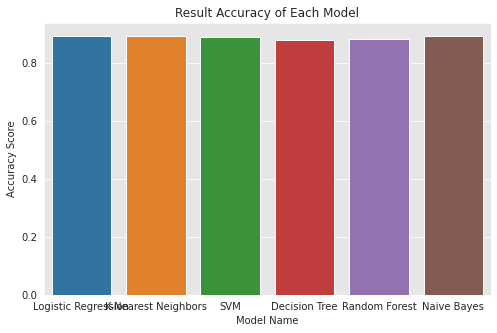

In [19]:
plt.subplots(figsize=(8,5))
sns.barplot(x='Model Name', y='Accuracy Score', data=result_models)
plt.title('Result Accuracy of Each Model')
plt.show()

Berdasarkan data diatas, maka Logistic Regression adalah Algoritma yang dipilih untuk membuat Model karena memiliki tingkat accuracy tertinggi dibandingkan dengan Algoritma yang lain yaitu 89,22%. 